In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [13]:
yf.__version__

'0.2.44'

# 1. Yahoo Finance API
## 1-1. Download
- [download](https://github.com/ranaroussi/yfinance/blob/dfe3ec8df7be8da5e6addc629ed8dfa95e2f896d/yfinance/multi.py)
### 1-1-1. Tickers

In [140]:
symbol = "AAPL"

# yf.download('TSM', start='2024-01-01', end='2024-11-13')
# yf.download('TSM', period='6mo', interval='1mo')
df = yf.download(tickers=symbol, interval="1d")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


In [3]:
# `pandas.to_datetime()`
df.index = pd.to_datetime(df.index.date)
df

,Open,High,Low,Close,Adj Close,Volume
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800
2024-11-11,225.000000,225.699997,221.500000,224.229996,224.229996,42005600


In [4]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-04',
               '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
               '2024-11-11', '2024-11-12'],
              dtype='datetime64[ns]', length=11072, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11072 entries, 1980-12-12 to 2024-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11072 non-null  float64
 1   High       11072 non-null  float64
 2   Low        11072 non-null  float64
 3   Close      11072 non-null  float64
 4   Adj Close  11072 non-null  float64
 5   Volume     11072 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 605.5 KB


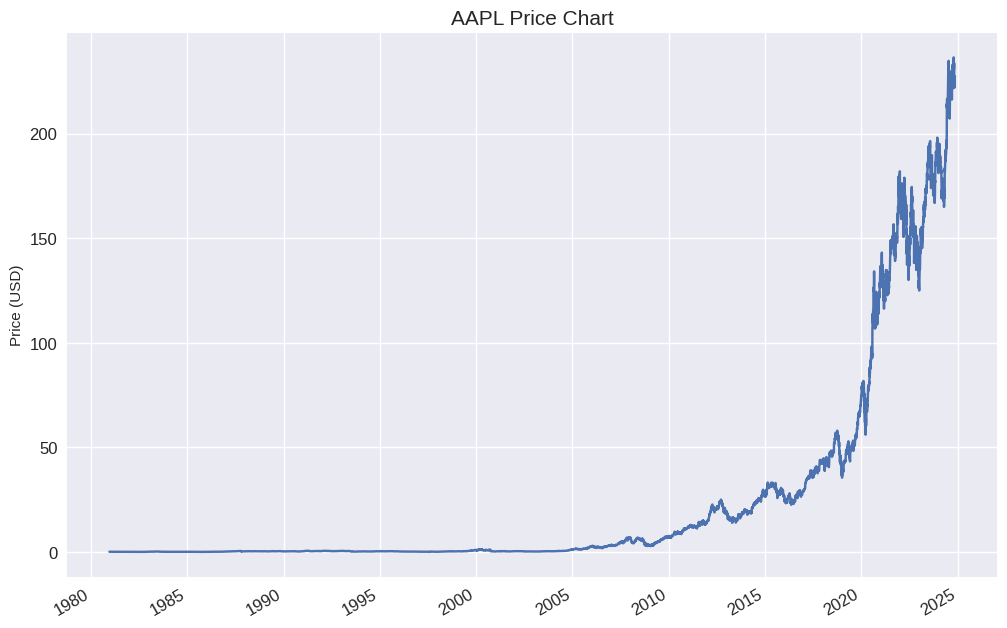

In [6]:
# Price Chart
df.Close.plot(figsize=(12, 8), fontsize=12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize=15)
plt.show()

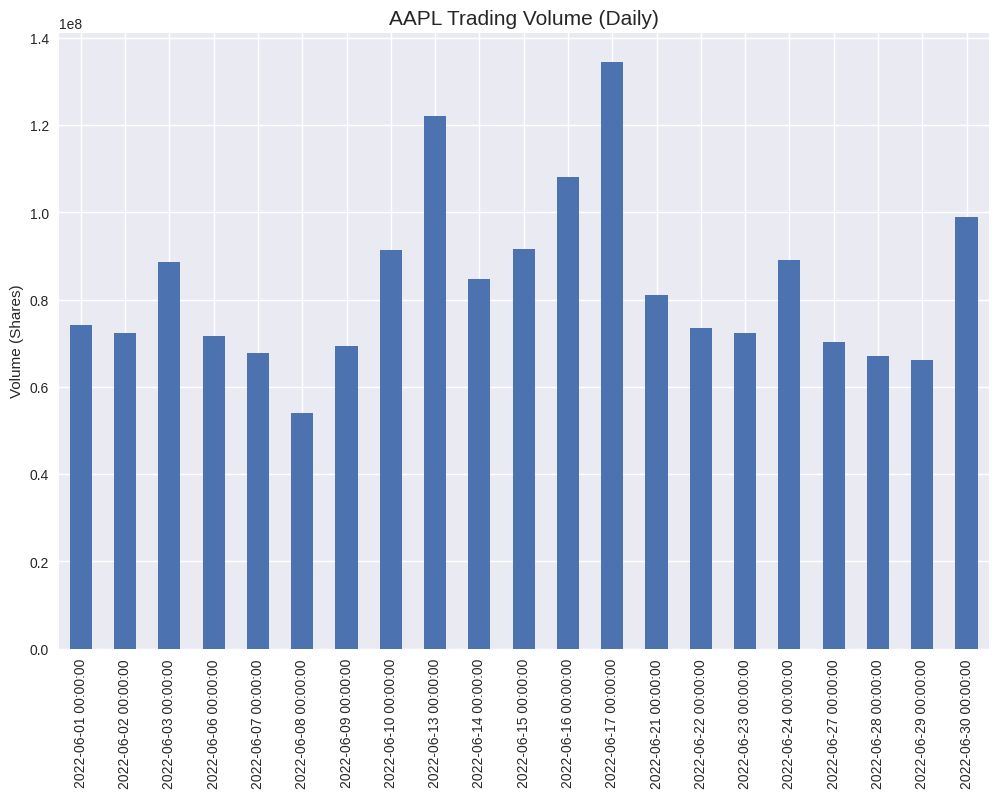

In [7]:
# Volume chart
df.loc["2022-6", "Volume"].plot(figsize=(12, 8), kind="bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (Daily)", fontsize=15)
plt.show()

In [8]:
# Trading volume (USD value)
df.Volume.mul(df.Close) 

1980-12-12    6.019952e+07
1980-12-15    2.139674e+07
1980-12-16    1.191798e+07
1980-12-17    9.985128e+06
1980-12-18    8.730367e+06
                  ...     
2024-11-06    1.215185e+10
2024-11-07    9.585484e+09
2024-11-08    8.699105e+09
2024-11-11    9.418916e+09
2024-11-12    9.053353e+09
Length: 11072, dtype: float64

In [124]:
# Multiple tickers
df = yf.download(tickers=["AAPL", "MSFT"])
df

[*********************100%***********************]  2 of 2 completed


Price                       Adj Close                   Close              \
Ticker                           AAPL        MSFT        AAPL        MSFT   
Date                                                                        
1980-12-12 00:00:00+00:00    0.098834         NaN    0.128348         NaN   
1980-12-15 00:00:00+00:00    0.093678         NaN    0.121652         NaN   
1980-12-16 00:00:00+00:00    0.086802         NaN    0.112723         NaN   
1980-12-17 00:00:00+00:00    0.088951         NaN    0.115513         NaN   
1980-12-18 00:00:00+00:00    0.091530         NaN    0.118862         NaN   
...                               ...         ...         ...         ...   
2024-11-06 00:00:00+00:00  222.475235  420.179993  222.720001  420.179993   
2024-11-07 00:00:00+00:00  227.229996  425.429993  227.479996  425.429993   
2024-11-08 00:00:00+00:00  226.960007  422.540009  226.960007  422.540009   
2024-11-11 00:00:00+00:00  224.229996  418.010010  224.229996  418.010010   
2024-11-12 00:00:00+00:00  224.229996  423.029999  224.229996  423.029999   

Price                            High                     Low              \
Ticker                           AAPL        MSFT        AAPL        MSFT   
Date                                                                        
1980-12-12 00:00:00+00:00    0.128906         NaN    0.128348         NaN   
1980-12-15 00:00:00+00:00    0.122210         NaN    0.121652         NaN   
1980-12-16 00:00:00+00:00    0.113281         NaN    0.112723         NaN   
1980-12-17 00:00:00+00:00    0.116071         NaN    0.115513         NaN   
1980-12-18 00:00:00+00:00    0.119420         NaN    0.118862         NaN   
...                               ...         ...         ...         ...   
2024-11-06 00:00:00+00:00  226.070007  420.450012  221.190002  410.519989   
2024-11-07 00:00:00+00:00  227.880005  426.850006  224.570007  419.880005   
2024-11-08 00:00:00+00:00  228.660004  426.500000  226.410004  421.779999   
2024-11-11 00:00:00+00:00  225.699997  424.809998  221.500000  416.000000   
2024-11-12 00:00:00+00:00  225.589996  424.440002  223.360001  417.200012   

Price                            Open                 Volume              
Ticker                           AAPL        MSFT       AAPL        MSFT  
Date                                                                      
1980-12-12 00:00:00+00:00    0.128348         NaN  469033600         NaN  
1980-12-15 00:00:00+00:00    0.122210         NaN  175884800         NaN  
1980-12-16 00:00:00+00:00    0.113281         NaN  105728000         NaN  
1980-12-17 00:00:00+00:00    0.115513         NaN   86441600         NaN  
1980-12-18 00:00:00+00:00    0.118862         NaN   73449600         NaN  
...                               ...         ...        ...         ...  
2024-11-06 00:00:00+00:00  222.610001  412.420013   54561100  26681800.0  
2024-11-07 00:00:00+00:00  224.630005  421.279999   42137700  19901800.0  
2024-11-08 00:00:00+00:00  227.169998  425.320007   38328800  16891400.0  
2024-11-11 00:00:00+00:00  225.000000  422.519989   42005600  24503300.0  
2024-11-12 00:00:00+00:00  224.550003  418.250000   40375300  19382500.0  

[11072 rows x 12 columns]

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11072 entries, 1980-12-12 00:00:00+00:00 to 2024-11-12 00:00:00+00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  11072 non-null  float64
 1   (Adj Close, MSFT)  9746 non-null   float64
 2   (Close, AAPL)      11072 non-null  float64
 3   (Close, MSFT)      9746 non-null   float64
 4   (High, AAPL)       11072 non-null  float64
 5   (High, MSFT)       9746 non-null   float64
 6   (Low, AAPL)        11072 non-null  float64
 7   (Low, MSFT)        9746 non-null   float64
 8   (Open, AAPL)       11072 non-null  float64
 9   (Open, MSFT)       9746 non-null   float64
 10  (Volume, AAPL)     11072 non-null  int64  
 11  (Volume, MSFT)     9746 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [126]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [127]:
# Outer index level
df.Close

Ticker,AAPL,MSFT
Date,,
1980-12-12 00:00:00+00:00,0.128348,NaN
1980-12-15 00:00:00+00:00,0.121652,NaN
1980-12-16 00:00:00+00:00,0.112723,NaN
1980-12-17 00:00:00+00:00,0.115513,NaN
1980-12-18 00:00:00+00:00,0.118862,NaN
...,...,...
2024-11-06 00:00:00+00:00,222.720001,420.179993
2024-11-07 00:00:00+00:00,227.479996,425.429993
2024-11-08 00:00:00+00:00,226.960007,422.540009


In [128]:
# One specific column
df.loc[:, ("Close", "MSFT")]

Date
1980-12-12 00:00:00+00:00           NaN
1980-12-15 00:00:00+00:00           NaN
1980-12-16 00:00:00+00:00           NaN
1980-12-17 00:00:00+00:00           NaN
1980-12-18 00:00:00+00:00           NaN
                                ...    
2024-11-06 00:00:00+00:00    420.179993
2024-11-07 00:00:00+00:00    425.429993
2024-11-08 00:00:00+00:00    422.540009
2024-11-11 00:00:00+00:00    418.010010
2024-11-12 00:00:00+00:00    423.029999
Name: (Close, MSFT), Length: 11072, dtype: float64

In [129]:
# One specific column
df.Close.MSFT

Date
1980-12-12 00:00:00+00:00           NaN
1980-12-15 00:00:00+00:00           NaN
1980-12-16 00:00:00+00:00           NaN
1980-12-17 00:00:00+00:00           NaN
1980-12-18 00:00:00+00:00           NaN
                                ...    
2024-11-06 00:00:00+00:00    420.179993
2024-11-07 00:00:00+00:00    425.429993
2024-11-08 00:00:00+00:00    422.540009
2024-11-11 00:00:00+00:00    418.010010
2024-11-12 00:00:00+00:00    423.029999
Name: MSFT, Length: 11072, dtype: float64

In [130]:
# Inner index level
df.loc[:, (slice(None), slice("AAPL"))]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2024-11-06 00:00:00+00:00,222.475235,222.720001,226.070007,221.190002,222.610001,54561100
2024-11-07 00:00:00+00:00,227.229996,227.479996,227.880005,224.570007,224.630005,42137700


In [131]:
df = df.swaplevel(axis="columns").sort_index(axis="columns")
df

Ticker                           AAPL                                      \
Price                       Adj Close       Close        High         Low   
Date                                                                        
1980-12-12 00:00:00+00:00    0.098834    0.128348    0.128906    0.128348   
1980-12-15 00:00:00+00:00    0.093678    0.121652    0.122210    0.121652   
1980-12-16 00:00:00+00:00    0.086802    0.112723    0.113281    0.112723   
1980-12-17 00:00:00+00:00    0.088951    0.115513    0.116071    0.115513   
1980-12-18 00:00:00+00:00    0.091530    0.118862    0.119420    0.118862   
...                               ...         ...         ...         ...   
2024-11-06 00:00:00+00:00  222.475235  222.720001  226.070007  221.190002   
2024-11-07 00:00:00+00:00  227.229996  227.479996  227.880005  224.570007   
2024-11-08 00:00:00+00:00  226.960007  226.960007  228.660004  226.410004   
2024-11-11 00:00:00+00:00  224.229996  224.229996  225.699997  221.500000   
2024-11-12 00:00:00+00:00  224.229996  224.229996  225.589996  223.360001   

Ticker                                                  MSFT              \
Price                            Open     Volume   Adj Close       Close   
Date                                                                       
1980-12-12 00:00:00+00:00    0.128348  469033600         NaN         NaN   
1980-12-15 00:00:00+00:00    0.122210  175884800         NaN         NaN   
1980-12-16 00:00:00+00:00    0.113281  105728000         NaN         NaN   
1980-12-17 00:00:00+00:00    0.115513   86441600         NaN         NaN   
1980-12-18 00:00:00+00:00    0.118862   73449600         NaN         NaN   
...                               ...        ...         ...         ...   
2024-11-06 00:00:00+00:00  222.610001   54561100  420.179993  420.179993   
2024-11-07 00:00:00+00:00  224.630005   42137700  425.429993  425.429993   
2024-11-08 00:00:00+00:00  227.169998   38328800  422.540009  422.540009   
2024-11-11 00:00:00+00:00  225.000000   42005600  418.010010  418.010010   
2024-11-12 00:00:00+00:00  224.550003   40375300  423.029999  423.029999   

Ticker                                                                     
Price                            High         Low        Open      Volume  
Date                                                                       
1980-12-12 00:00:00+00:00         NaN         NaN         NaN         NaN  
1980-12-15 00:00:00+00:00         NaN         NaN         NaN         NaN  
1980-12-16 00:00:00+00:00         NaN         NaN         NaN         NaN  
1980-12-17 00:00:00+00:00         NaN         NaN         NaN         NaN  
1980-12-18 00:00:00+00:00         NaN         NaN         NaN         NaN  
...                               ...         ...         ...         ...  
2024-11-06 00:00:00+00:00  420.450012  410.519989  412.420013  26681800.0  
2024-11-07 00:00:00+00:00  426.850006  419.880005  421.279999  19901800.0  
2024-11-08 00:00:00+00:00  426.500000  421.779999  425.320007  16891400.0  
2024-11-11 00:00:00+00:00  424.809998  416.000000  422.519989  24503300.0  
2024-11-12 00:00:00+00:00  424.440002  417.200012  418.250000  19382500.0  

[11072 rows x 12 columns]

In [132]:
df.AAPL

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...,...
2024-11-06 00:00:00+00:00,222.475235,222.720001,226.070007,221.190002,222.610001,54561100
2024-11-07 00:00:00+00:00,227.229996,227.479996,227.880005,224.570007,224.630005,42137700
2024-11-08 00:00:00+00:00,226.960007,226.960007,228.660004,226.410004,227.169998,38328800


In [142]:
symbol = "AAPL"

df = yf.download(symbol)

# Write to local CSV file
df.to_csv(path_or_buf="datasets/apple.csv")

# Load from local CSV file
df_aapl = pd.read_csv("datasets/apple.csv", index_col="Date", parse_dates=["Date"])
df_aapl.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11072 entries, 1980-12-12 to 2024-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11072 non-null  float64
 1   High       11072 non-null  float64
 2   Low        11072 non-null  float64
 3   Close      11072 non-null  float64
 4   Adj Close  11072 non-null  float64
 5   Volume     11072 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 605.5 KB


In [149]:
# Multiple symbols
symbols = ["AAPL", "MSFT"]

# Write to local CSV file
df.to_csv(path_or_buf="datasets/aapl_msft.csv")

# Load from local CSV file
df_aapl = pd.read_csv("datasets/aapl_msft.csv", header=[0], index_col=[0], parse_dates=[0])
df_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11072 entries, 1980-12-12 to 2024-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11072 non-null  float64
 1   High       11072 non-null  float64
 2   Low        11072 non-null  float64
 3   Close      11072 non-null  float64
 4   Adj Close  11072 non-null  float64
 5   Volume     11072 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 605.5 KB


### 1-1-2. Period

In [14]:
df.loc["2022-01-01":"2022-01-15"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.076599,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,176.803833,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.100830,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.227936,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.395203,86709100
2022-01-10,169.080002,172.500000,168.169998,172.190002,169.414841,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,172.258286,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,172.700989,74805200
2022-01-13,175.779999,176.619995,171.789993,172.190002,169.414841,84505800
2022-01-14,171.339996,173.779999,171.089996,173.070007,170.280685,80440800


In [15]:
df.loc["2022"]

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.076599,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,176.803833,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.100830,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.227936,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,169.395203,86709100
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.487808,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.676849,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.728363,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.261215,75703700


In [16]:
df.loc["2017":]

,Open,High,Low,Close,Adj Close,Volume
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.891962,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.861862,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,26.998465,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.299450,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.549498,134247600
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800
2024-11-11,225.000000,225.699997,221.500000,224.229996,224.229996,42005600


In [17]:
df = yf.download(tickers=symbol, start="2020-07-01", end="2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,88.698456,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,88.698456,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,91.071175,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,90.788597,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,92.903053,117092000
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.059875,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.047531,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.662994,124486200


In [18]:
# Last 30 days
df = yf.download(tickers = symbol, period = "1mo")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.045807,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.593002,64751400
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.525269,34082200
2024-10-17,233.429993,233.850006,230.520004,232.149994,231.894867,32993800
2024-10-18,236.179993,236.179993,234.009995,235.000000,234.741730,46431500
2024-10-21,234.449997,236.850006,234.449997,236.479996,236.220108,36254500
2024-10-22,233.889999,236.220001,232.600006,235.860001,235.600800,38846600
2024-10-23,234.080002,235.139999,227.759995,230.759995,230.506393,52287000
2024-10-24,229.979996,230.820007,228.410004,230.570007,230.316620,31109500


In [19]:
# Last 365 days
df = yf.download(tickers=symbol, period="1y")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-13,185.820007,186.029999,184.210007,184.800003,183.899063,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,186.526215,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,187.093430,53790500
2023-11-16,189.570007,190.960007,188.649994,189.710007,188.785156,54412900
2023-11-17,190.250000,190.380005,188.570007,189.690002,188.765228,50922700
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


In [20]:
# Year to date 
df = yf.download(tickers=symbol, period="ytd")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.734985,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.351761,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.023163,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.296707,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.655365,59144500
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


In [21]:
# Maximum period
df = yf.download(tickers=symbol, period="max")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


### 1-1-3. Interval

In [22]:
# Daily by default
df = yf.download(tickers=symbol, interval="1d")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600
...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800


In [23]:
# Monthly
df = yf.download(tickers=symbol, interval="1mo")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,0.130022,0.138951,0.124442,0.129464,0.099694,6366416000
1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085084,4733388800
1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076059,4615587200
1985-04-01,0.098772,0.102679,0.087612,0.094866,0.073052,2868028800
1985-05-01,0.094866,0.099330,0.075335,0.077567,0.059730,4639129600
...,...,...,...,...,...,...
2024-07-01,212.089996,237.229996,211.919998,222.080002,221.579468,1153099800
2024-08-01,224.369995,232.919998,196.000000,229.000000,228.483871,1122667000
2024-09-01,228.550003,233.089996,213.919998,233.000000,232.743942,1232140300


In [24]:
# Weekly
df = yf.download(tickers=symbol, interval="1wk")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-08,0.128348,0.128906,0.128348,0.128348,0.098834,469033600
1980-12-15,0.122210,0.126674,0.112723,0.126116,0.097116,490134400
1980-12-22,0.132254,0.159040,0.132254,0.158482,0.122039,187891200
1980-12-29,0.160714,0.161272,0.152344,0.154018,0.118602,219452800
1981-01-05,0.151228,0.151228,0.135045,0.142299,0.109577,197904000
...,...,...,...,...,...,...
2024-10-14,228.699997,237.490005,228.600006,235.000000,234.741730,218141000
2024-10-21,234.449997,236.850006,227.759995,231.410004,231.155685,197299900
2024-10-28,233.320007,234.729996,220.270004,222.910004,222.665024,248222000


In [25]:
# Intraday 1 hour
df = yf.download(tickers=symbol, period="1y", interval="1h")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-13 09:30:00-05:00,185.820007,186.029999,184.210007,184.766098,184.766098,11087334
2023-11-13 10:30:00-05:00,184.770004,185.139999,184.389999,184.960007,184.960007,5748681
2023-11-13 11:30:00-05:00,184.960007,185.134995,184.500000,184.565002,184.565002,5079289
2023-11-13 12:30:00-05:00,184.570007,184.929901,184.389999,184.559998,184.559998,2665925
2023-11-13 13:30:00-05:00,184.570007,185.009995,184.460007,184.990097,184.990097,2982413
...,...,...,...,...,...,...
2024-11-12 11:30:00-05:00,224.999893,225.509995,223.884995,223.919998,223.919998,4075218
2024-11-12 12:30:00-05:00,223.919998,224.470001,223.354996,224.470001,224.470001,2814384
2024-11-12 13:30:00-05:00,224.449997,224.759903,224.139999,224.619904,224.619904,2559013


In [26]:
# Intraday 1 minute
df = yf.download(tickers=symbol, period="5d", interval="1m")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-11-06 09:30:00-05:00,221.235504,221.235504,221.235504,221.235504,221.235504,3151791
2024-11-06 09:31:00-05:00,221.225006,223.115005,221.225006,223.100006,223.100006,574905
2024-11-06 09:32:00-05:00,223.104996,224.570007,223.080002,224.209503,224.209503,605851
2024-11-06 09:33:00-05:00,224.179993,224.507507,224.110001,224.179993,224.179993,406301
2024-11-06 09:34:00-05:00,224.190002,225.220001,224.089996,225.190002,225.190002,476851
...,...,...,...,...,...,...
2024-11-12 15:55:00-05:00,224.470001,224.580002,224.330002,224.511200,224.511200,194908
2024-11-12 15:56:00-05:00,224.509995,224.649994,224.460007,224.639999,224.639999,184482
2024-11-12 15:57:00-05:00,224.649994,224.729996,224.419998,224.550003,224.550003,265856


### 1-1-4. Exchanges
- [Exchanges & Data Providers on Yahoo Finance](https://help.yahoo.com/kb/SLN2310.html)

In [112]:
# yf.download(tickers="RELIANCE")
# 1 Failed download:
# ['RELIANCE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')

yf.download(tickers="RELIANCE.NS")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,7.319124,7.358397,7.270925,7.345901,3.669021,104121369
1996-01-02,7.328050,7.363753,7.235222,7.288776,3.640488,168743308
1996-01-03,7.408381,7.745775,7.328050,7.344116,3.668131,209323879
1996-01-04,7.274495,7.297702,7.178097,7.276280,3.634248,216900264
1996-01-05,7.247718,7.247718,7.163816,7.226296,3.609282,166708467
...,...,...,...,...,...,...
2024-11-07,1324.000000,1324.000000,1302.599976,1305.650024,1305.650024,9611974
2024-11-08,1297.650024,1301.650024,1275.000000,1283.750000,1283.750000,19814406
2024-11-11,1278.949951,1286.000000,1267.000000,1272.699951,1272.699951,9056552


In [114]:
# German ticker (Deutsche Boerse XETRA)
yf.download(tickers="LHA.DE")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-16,7.597196,7.688404,7.392869,7.462167,4.093603,1066584
1996-12-17,7.425698,7.622745,7.370959,7.615466,4.177701,1052852
1996-12-18,7.626385,7.805162,7.527897,7.564366,4.149669,1332249
1996-12-19,7.535177,7.692044,7.535177,7.648295,4.195710,594524
1996-12-20,7.644655,7.735864,7.480438,7.516907,4.123633,763507
...,...,...,...,...,...,...
2024-11-07,6.230000,6.316000,6.180000,6.244000,6.244000,4226156
2024-11-08,6.272000,6.396000,6.266000,6.310000,6.310000,4195039
2024-11-11,6.340000,6.386000,6.302000,6.370000,6.370000,3517954


In [115]:
# German Ticker (Frankfurt Stock Exchange)
yf.download(tickers="LHA.F")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,17.198463,17.626640,16.484833,16.484833,10.004572,443367
2000-01-04,16.484833,16.698921,15.985293,16.413471,9.961262,682847
2000-01-05,15.878249,16.306425,15.557116,16.020973,9.723057,507406
2000-01-06,16.056656,17.091417,15.913930,16.984373,10.307740,323837
2000-01-07,16.770285,17.091417,16.484833,17.055737,10.351049,383812
...,...,...,...,...,...,...
2024-11-07,6.220000,6.294000,6.180000,6.264000,6.264000,13144
2024-11-08,6.232000,6.362000,6.232000,6.320000,6.320000,15855
2024-11-11,6.284000,6.394000,6.284000,6.346000,6.346000,8176


In [123]:
yf.download(tickers='2330.TW')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649033,69.649033,68.475182,69.649033,34.216957,200662336736
2000-01-05,69.649033,71.214043,68.866341,71.214043,34.985813,402466805912
2000-01-06,70.822884,71.214043,69.649033,69.649033,34.216957,197545715802
2000-01-07,67.301331,68.475182,66.518639,67.692490,33.255749,235270344752
2000-01-10,69.649033,70.431351,68.475182,70.040192,34.409126,276171685539
...,...,...,...,...,...,...
2024-11-07,1050.000000,1075.000000,1050.000000,1065.000000,1065.000000,43975446
2024-11-08,1085.000000,1090.000000,1080.000000,1090.000000,1090.000000,37099479
2024-11-11,1080.000000,1090.000000,1070.000000,1085.000000,1085.000000,34690205


In [134]:
df = yf.download(tickers=["LHA.F", "LHA.DE"]).Close
df

[*********************100%***********************]  2 of 2 completed


Ticker,LHA.DE,LHA.F
Date,,
1996-12-16 00:00:00+00:00,7.462167,NaN
1996-12-17 00:00:00+00:00,7.615466,NaN
1996-12-18 00:00:00+00:00,7.564366,NaN
1996-12-19 00:00:00+00:00,7.648295,NaN
1996-12-20 00:00:00+00:00,7.516907,NaN
...,...,...
2024-11-07 00:00:00+00:00,6.244000,6.264
2024-11-08 00:00:00+00:00,6.310000,6.320
2024-11-11 00:00:00+00:00,6.370000,6.346


In [135]:
# `df.LHA.F` does not work
df["LHA.F"]

Date
1996-12-16 00:00:00+00:00      NaN
1996-12-17 00:00:00+00:00      NaN
1996-12-18 00:00:00+00:00      NaN
1996-12-19 00:00:00+00:00      NaN
1996-12-20 00:00:00+00:00      NaN
                             ...  
2024-11-07 00:00:00+00:00    6.264
2024-11-08 00:00:00+00:00    6.320
2024-11-11 00:00:00+00:00    6.346
2024-11-12 00:00:00+00:00    6.332
2024-11-13 00:00:00+00:00    6.248
Name: LHA.F, Length: 7160, dtype: float64

In [137]:
df.columns = ["LHA_DE", "LHA_F"]
df

,LHA_DE,LHA_F
Date,,
1996-12-16 00:00:00+00:00,7.462167,NaN
1996-12-17 00:00:00+00:00,7.615466,NaN
1996-12-18 00:00:00+00:00,7.564366,NaN
1996-12-19 00:00:00+00:00,7.648295,NaN
1996-12-20 00:00:00+00:00,7.516907,NaN
...,...,...
2024-11-07 00:00:00+00:00,6.244000,6.264
2024-11-08 00:00:00+00:00,6.310000,6.320
2024-11-11 00:00:00+00:00,6.370000,6.346


In [138]:
df.LHA_F

Date
1996-12-16 00:00:00+00:00      NaN
1996-12-17 00:00:00+00:00      NaN
1996-12-18 00:00:00+00:00      NaN
1996-12-19 00:00:00+00:00      NaN
1996-12-20 00:00:00+00:00      NaN
                             ...  
2024-11-07 00:00:00+00:00    6.264
2024-11-08 00:00:00+00:00    6.320
2024-11-11 00:00:00+00:00    6.346
2024-11-12 00:00:00+00:00    6.332
2024-11-13 00:00:00+00:00    6.248
Name: LHA_F, Length: 7160, dtype: float64

## 1-2. Ticker

In [150]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [151]:
aapl = yf.Ticker(ticker="AAPL")
aapl

yfinance.Ticker object <AAPL>

In [152]:
# Historical price & volume data
aapl.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-14 00:00:00-04:00,228.448658,231.475327,228.348777,231.045807,39882100,0.00,0.0
2024-10-15 00:00:00-04:00,233.353261,237.229001,232.114618,233.593002,64751400,0.00,0.0
2024-10-16 00:00:00-04:00,231.345474,231.864891,229.587398,231.525269,34082200,0.00,0.0
2024-10-17 00:00:00-04:00,233.173459,233.593011,230.266669,231.894867,32993800,0.00,0.0
2024-10-18 00:00:00-04:00,235.920426,235.920426,233.752812,234.741730,46431500,0.00,0.0
2024-10-21 00:00:00-04:00,234.192340,236.589712,234.192340,236.220108,36254500,0.00,0.0
2024-10-22 00:00:00-04:00,233.632963,235.960405,232.344388,235.600800,38846600,0.00,0.0
2024-10-23 00:00:00-04:00,233.822752,234.881585,227.509690,230.506393,52287000,0.00,0.0
2024-10-24 00:00:00-04:00,229.727257,230.566345,228.158990,230.316620,31109500,0.00,0.0


In [153]:
aapl.get_info()

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [154]:
info = pd.Series(aapl.get_info())
info

address1             One Apple Park Way
city                          Cupertino
state                                CA
zip                               95014
country                   United States
                            ...        
grossMargins                    0.46206
ebitdaMargins                   0.34437
operatingMargins                0.31171
financialCurrency                   USD
trailingPegRatio                 2.3215
Length: 132, dtype: object

In [155]:
info.head(50)

address1                                                     One Apple Park Way
city                                                                  Cupertino
state                                                                        CA
zip                                                                       95014
country                                                           United States
phone                                                            (408) 996-1010
website                                                   https://www.apple.com
industry                                                   Consumer Electronics
industryKey                                                consumer-electronics
industryDisp                                               Consumer Electronics
sector                                                               Technology
sectorKey                                                            technology
sectorDisp                              

In [156]:
fast_info = aapl.get_fast_info()
fast_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [157]:
fast_info["currency"]

'USD'

In [158]:
fast_info["lastPrice"]

224.22999572753906

# 2. Dividends
A **Dividend** is a distribution of profits by a corporation to its shareholders. Companies are free to distribute (all, parts, or none) of their profits to shareholders, so-called dividend payout policy. Dividend payouts are an import source of income for equity investors. Total return (profit) of stocks consist of stock price increase & dividend payouts. 

For innovative & high-growth companies, stock price increase is relatively more important; for mature & highly profitable companies, dividend payouts can be a significant part of total return (profit).

In [87]:
df = pd.read_csv("datasets/aapl.csv", index_col="Date", parse_dates=["Date"])
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [28]:
# Set `actions=True` to get `Dividends` & `Stock Splits`
df = yf.download(tickers=symbol, actions=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098834,469033600,0.00,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093678,175884800,0.00,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086802,105728000,0.00,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.088951,86441600,0.00,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091530,73449600,0.00,0.0
...,...,...,...,...,...,...,...,...
2024-11-06,222.610001,226.070007,221.190002,222.720001,222.475235,54561100,0.00,0.0
2024-11-07,224.630005,227.880005,224.570007,227.479996,227.229996,42137700,0.00,0.0
2024-11-08,227.169998,228.660004,226.410004,226.960007,226.960007,38328800,0.25,0.0


In [88]:
df.loc[df.Dividends != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-05-11,0.343750,0.354911,0.342634,0.343750,0.268340,197276800,0.000536,0.0
1987-08-10,0.430804,0.430804,0.408482,0.430804,0.336732,77996800,0.000536,0.0
1987-11-17,0.328125,0.330357,0.312500,0.312500,0.244794,268800000,0.000714,0.0
1988-02-12,0.362723,0.370536,0.361607,0.366071,0.287323,137760000,0.000714,0.0
1988-05-16,0.361607,0.369420,0.357143,0.368304,0.289648,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
2021-08-06,146.350006,147.110001,145.630005,146.139999,145.325668,54126800,0.220000,0.0
2021-11-05,151.889999,152.199997,150.059998,151.279999,150.656570,65463900,0.220000,0.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,171.898315,82465400,0.220000,0.0


In [89]:
# Cumulative dividends per share
df.Dividends.sum()

6.603564

In [90]:
# Cumulative stock price increase
df.Close.iloc[-1] - df.Close.iloc[0]

147.1416562795639

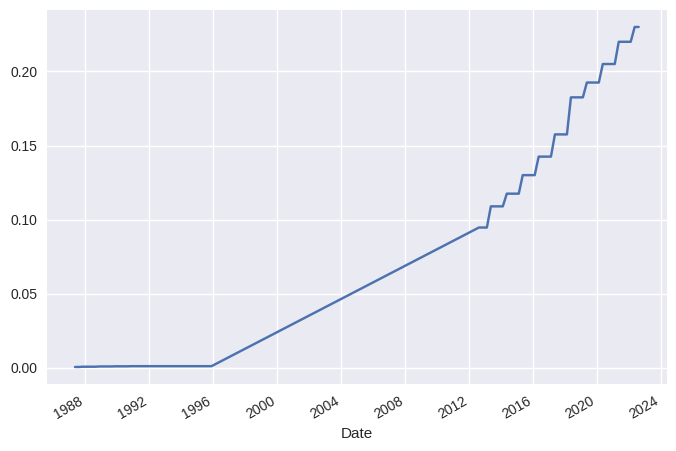

In [91]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.show()

# 3. Adjusted Close Price
The **Adjusted Close Price** is the backward adjusted (reduced) close price for all applicable splits & dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.

In [92]:
df_adj_close_dividends = df[["Close", "Adj Close", "Dividends"]].copy()
df_adj_close_dividends

,Close,Adj Close,Dividends
Date,,,
1980-12-12,0.128348,0.100039,0.0
1980-12-15,0.121652,0.094820,0.0
1980-12-16,0.112723,0.087861,0.0
1980-12-17,0.115513,0.090035,0.0
1980-12-18,0.118862,0.092646,0.0
...,...,...,...
2022-10-17,142.410004,142.410004,0.0
2022-10-18,143.750000,143.750000,0.0
2022-10-19,143.860001,143.860001,0.0


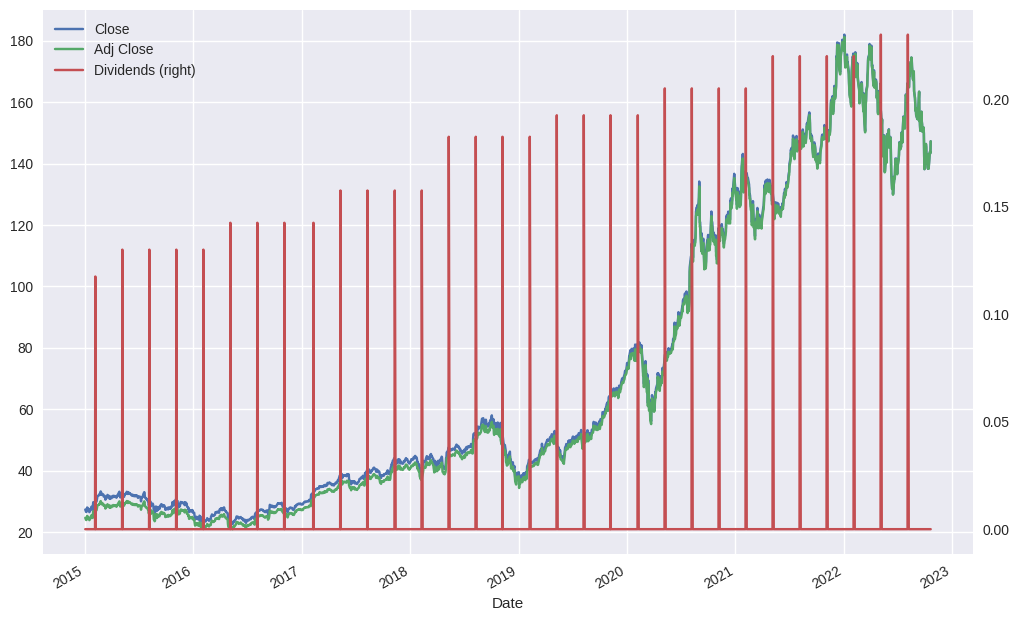

In [93]:
df_adj_close_dividends.loc["2015":].plot(figsize=(12, 8), secondary_y="Dividends")
plt.show()

In [94]:
df_adj_close_dividends[df_adj_close_dividends.Dividends > 0]

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [95]:
last_dividends = df_adj_close_dividends.loc["2022-08-01": "2022-08-5"].copy()
last_dividends

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [96]:
last_dividends.Close - last_dividends["Adj Close"]

Date
2022-08-01    0.224030
2022-08-02    0.221954
2022-08-03    0.230438
2022-08-04    0.229996
2022-08-05    0.000000
dtype: float64

In [97]:
multiplier = (1 - 0.23 / 165.809998)
multiplier

0.9986128701358528

In [98]:
last_dividends["Adj Close Calculation"] = last_dividends.Close * multiplier
last_dividends

,Close,Adj Close,Dividends,Adj Close Calculation
Date,,,,
2022-08-01,161.509995,161.285965,0.00,161.285959
2022-08-02,160.009995,159.788040,0.00,159.788040
2022-08-03,166.130005,165.899567,0.00,165.899561
2022-08-04,165.809998,165.580002,0.00,165.579998
2022-08-05,165.350006,165.350006,0.23,165.120644


In [99]:
# Total multiplier of all dividends
df["Adj Close"] / df["Close"]

Date
1980-12-12    0.779439
1980-12-15    0.779440
1980-12-16    0.779439
1980-12-17    0.779440
1980-12-18    0.779439
                ...   
2022-10-17    1.000000
2022-10-18    1.000000
2022-10-19    1.000000
2022-10-20    1.000000
2022-10-21    1.000000
Length: 10555, dtype: float64

# 4. Stock Splits

**Stock Split** allows a company to break (split) each share into multiple shares without affecting its market capitalization (total value of all its shares) or each investor's stake in the company. The motivation is to reduce price per share & increase granularity.

All prices (OHLC, Adj Close) & dividends are backward adjusted (reduced) for stock splits. Thus, prices correctly reflect true price performance which ignores price drops caused by stock splits. 

In [100]:
splits = df.loc[df["Stock Splits"] > 0]
splits

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-06-16,0.370536,0.372768,0.339286,0.370536,0.289250,342720000,0.0,2.0
2000-06-21,0.901786,1.016741,0.898438,0.993304,0.848115,490000000,0.0,2.0
2005-02-28,1.595714,1.612143,1.570000,1.602143,1.367960,651610400,0.0,2.0
2014-06-09,23.174999,23.469999,22.937500,23.424999,20.925592,301660000,0.0,7.0
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.500870,225702700,0.0,4.0


In [101]:
splits.loc["2020-08-31", "Close"] 

129.0399932861328

In [102]:
# 129.0399932861328 * 4 = 516.1599731445312 * 1
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

516.1599731445312

In [103]:
# Calculate the unadjusted (observable) prices (1:1 on all other days)
df["Stock Splits"].replace(to_replace=0, value=1, inplace=True) 
df

/tmp/ipykernel_13097/2201942701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stock Splits"].replace(to_replace=0, value=1, inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0


In [104]:
# Cumulative multipier
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() 
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0


In [105]:
# Observable close price
df["Unadj Close"] = df["Close"] * df.Multiplier 
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Unadj Close
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


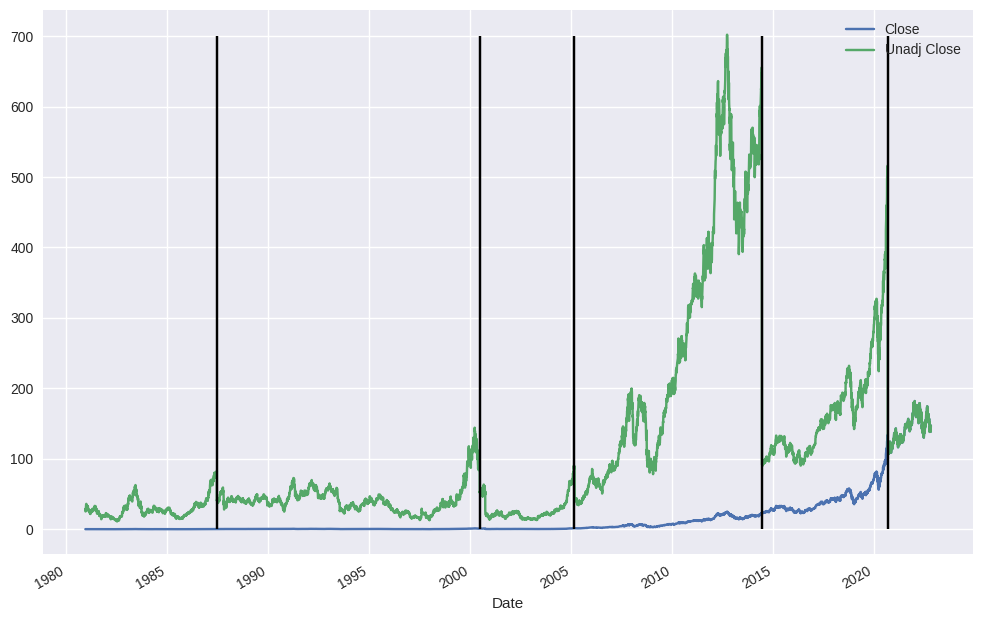

In [106]:
df[["Close", "Unadj Close"]].plot(figsize=(12 ,8))
plt.vlines(splits.index, 0, 700, color="black")
plt.show()

In [107]:
# Unadjusted dividends
df["Unadj Dividends"] = df["Dividends"] * df.Multiplier
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Unadj Close,Unadj Dividends
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001,0.0


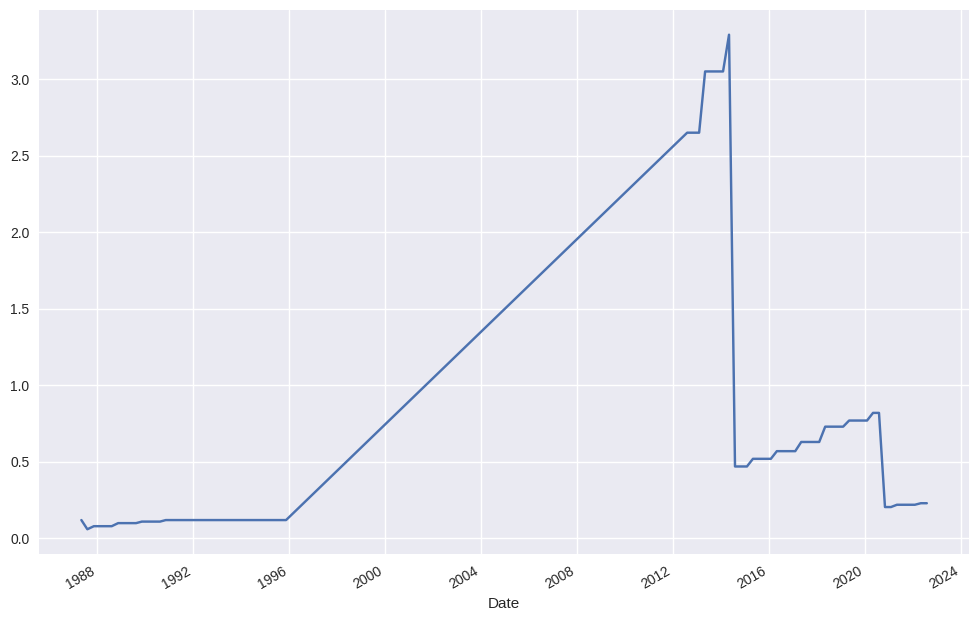

In [108]:
df.loc[df['Unadj Dividends'] != 0]['Unadj Dividends'].plot(figsize=(12, 8))
plt.show()

In [109]:
# Unadjusted trading volume (number of shares)
df["Unadj Volume"] = df["Volume"] / df.Multiplier
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Unadj Close,Unadj Dividends,Unadj Volume
Date,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950,0.0,2093900.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048,0.0,785200.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952,0.0,472000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911,0.0,385900.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089,0.0,327900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004,0.0,85250900.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000,0.0,99136600.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001,0.0,61758300.0


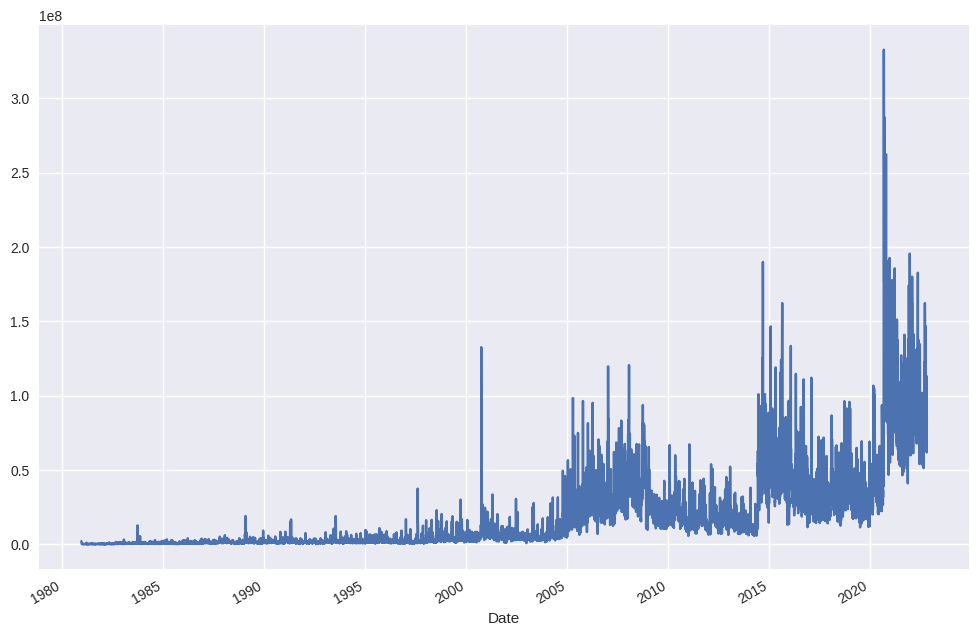

In [110]:
df["Unadj Volume"].plot(figsize=(12, 8))
plt.show()

# 5. Market Capitalization
**Market Capitalization**, or **Market Cap**, represents the total dollar market value of a company's outstanding shares of stock. To calculate a company's market cap, multiply the number of outstanding shares by the current market value of one share.

In [159]:
market_cap = info.marketCap
market_cap

3389415751680

In [160]:
# market_cap = fast_info["marketCap"]
market_cap = fast_info["market_cap"]
market_cap

3401479228382.7188

# 6. Shares Outstanding
**Shares Outstanding** refers to a company's stock currently held by all its shareholders. These include share blocks held by institutional investors and restricted shares owned by the company’s officers and insiders.

In [162]:
shares = info.sharesOutstanding
shares

15115799552

# 7. Share Price
**Share Price** is not a good indicator for performance, value, or importance of a stock. For example, share price can be manipulated by stock splits. Use market capitalization instead.

In [163]:
price = info.currentPrice
price

224.23

In [164]:
price = fast_info.last_price
price

224.22999572753906

In [165]:
market_cap / shares

225.02807189796735

# 8. Debt

In [166]:
# Market value of debt
debt = info.totalDebt
debt

119058997248

# 9. Firm Value
**Firm Value** is total company value available to all suppliers of capital including equity & debt. 

In financial distress or insolvency, firm value is less than dept. Shareholders have a residual claim on the total company value only, subordinated to debt. However, shareholder liability is limited to already provided capital, no obligations to provide additional capital in financial distress. Equity value is close to zero. Debt is in default. Then the company is put into liquidation which satisfaction on a pro rata basis is in accordance with the insolvency quota.

In [167]:
# Firm value
firm_value = market_cap + debt
firm_value

3520538225630.7188

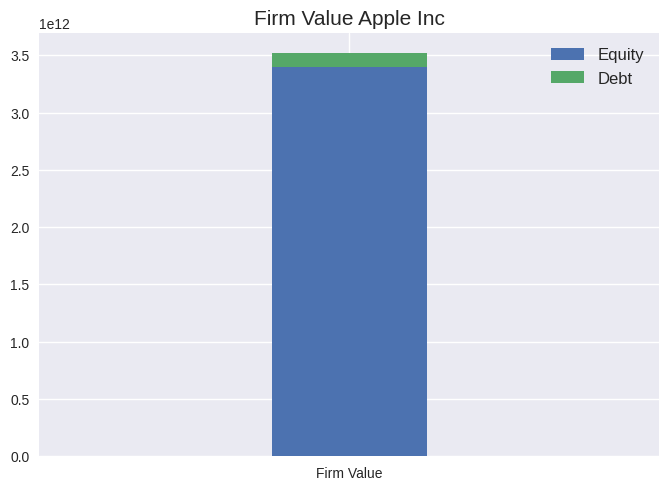

In [168]:
plt.bar(["Firm Value"], [market_cap], label = "Equity", width=0.5)
plt.bar(["Firm Value"], [debt], label="Debt", width=0.5, bottom=market_cap)
plt.xlim(-1, 1)
plt.legend(fontsize=12)
plt.title("Firm Value Apple Inc", fontsize=15)
plt.show()

# 10. Price-to-Book (P/B) Ratio
Factors that drive **Price-to-Book (P/B) Ratio**:
- **Profitability**
- **Growth**
- **Sector/Industry** such as Service/IT versus Manufacturing.
- **Asset/Capital Intensity** is a suppressing factor.
- Operational business decisions like **Outsourcing Manufacturing**.
- **Off-Balance Sheet Financing** like leasing.

In [169]:
# High P/B ratio
book_value = info["bookValue"]
book_value

3.767

In [170]:
pb_ratio = price / book_value
pb_ratio

59.524819678136204

In [171]:
info["priceToBook"]

59.52482

In [172]:
# Low P/B ratio
symbol = "GM"

yf.Ticker(ticker=symbol).get_info()["priceToBook"]

0.89027077

# 11. Dividend Yield

In [174]:
info.dividendYield

0.0045

# 12. Forward Price-to-Earnings (P/E)

In [175]:
info.forwardPE

26.98315